# Project 3 Modeling 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from collections import Counter
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

### Table of Contents
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [GridsearchCV logistic regression count vectorizer](#GridsearchCV-logistic-regression-count-vectorizer)
- [Gridsearch CV logistic regresssion TFIDF vectorizer](#Gridsearch-CV-logistic-regresssion-TFIDF-vectorizer)
- [Gridsearch CV multinomial bayes count vectorizer](#Gridsearch-CV-multinomial-bayes-count-vectorizer)
- [Gridsearch CV multinomial TFIDF vectorizer](#Gridsearch-CV-multinomial-TFIDF-vectorizer)
- [Evaluation](#Evaluation)
- [Conclusion and recommendation](#Conclusion-and-recommendation)

## Preprocessing and Modeling

In [2]:
#read the comb_df csv
comb_df= pd.read_csv('./datasets/comb_df.csv')

In [3]:
comb_df.shape

(1939, 6)

In [4]:
comb_df.head()

subreddit                                              title  \
0  personalfinance  Overwhelmed By My Finances &amp; Getting Force...   
1  personalfinance              National Insurance - Year is Not Full   
2  personalfinance                                Refinancing Process   
3  personalfinance  Finally maxing out my SEP IRA (as an employee)...   
4  personalfinance  Advice for limiting damage from joint &amp; au...   

                                            selftext  \
0  So, the overview: I'm an out of work cook with...   
1  According to [tax.service.gov.uk](https://tax....   
2  I’m in Wyoming. And I’m pursuing a refinance t...   
3  Like the title says, I am now financially able...   
4  My fiance's father is going through a pretty r...   

                                            all_text  y  \
0  Overwhelmed By My Finances &amp; Getting Force...  1   
1  National Insurance - Year is Not FullAccording...  1   
2  Refinancing ProcessI’m in Wyoming. And I’m pur...  1   
3  Finally maxing out my SEP IRA (as an employee)...  1   
4  Advice for limiting damage from joint &amp; au...  1   

                                          clean_text  
0  finance getting forceful othersso overview wor...  
1  national insurance year one asking voluntary c...  
2  refinancing processi wyoming pursuing refinanc...  
3  finally maxing sep ira employee title say fina...  
4  limiting joint user person go rehab fiance fat...

Majority class personalfinance will be 1 while StudentLoans is 0 for target y

### Baseline accuracy
Calculate baseline accuracy to see if model is better than null model (predicting plurality class). 

In [5]:
comb_df['y'].value_counts(normalize=True)

1    0.51212
0    0.48788
Name: y, dtype: float64

The baseline accuracy for student loans is 0.48788 and 0.51212 for personalfinance. We will proceed to create our X which is the clean_text column of the comb_df consisting of cleaned titles and selftext combined and y target classifications where y is the subreddit category in which personalfinance is 1 and StudentLoans is 0. We will proceed to do a train test split on the X and y variables and begin modeling.

In [6]:
#create X matrix and target y
X = comb_df['clean_text']
y = comb_df['y']

In [7]:
#do a train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [8]:
type(y_test)

pandas.core.series.Series

In [9]:
# Instantiate the "CountVectorizer" object, which is sklearn's
# bag of words tool.
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 1000,
                             min_df=2,
                             max_df=.98) 

In [10]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)

In [11]:
# Convert X_train into a DataFrame.

X_train_cvec_df = pd.DataFrame(X_train_cvec.toarray(),
                          columns=cvec.get_feature_names())
X_train_cvec_df.head()

ability  able  absolutely  accept  accepting  access  account  accrue  \
0        0     0           0       0          0       0        3       0   
1        0     0           0       0          0       0        0       0   
2        0     0           0       0          0       0        0       0   
3        0     0           0       0          0       0        2       0   
4        0     1           0       0          0       0        0       0   

   accruing  across  act  action  activity  actual  actually  affect  age  \
0         0       0    0       0         0       1         1       0    0   
1         0       0    0       0         0       0         0       0    0   
2         0       0    0       0         0       0         0       0    0   
3         0       0    0       0         0       0         0       0    0   
4         0       0    1       0         0       0         0       0    0   

   agency  aggressive  aggressively  ago  agreement  alert  allocation  allow  \
0       0           0             0    0          0      0           0      0   
1       0           0             0    0          0      0           0      0   
2       0           0             0    0          0      0           0      0   
3       0           0             0    1          0      0           0      0   
4       0           0             1    0          0      0           0      0   

   ally  almost  alone  along  although  always  amazing  american  amount  \
0     0       0      0      0         0       0        0         0       0   
1     0       0      0      0         0       0        0         0       0   
2     0       0      0      0         0       0        0         0       0   
3     1       0      0      0         0       0        0         0       0   
4     0       0      0      0         0       0        0         0       0   

   annual  annually  another  answer  anxiety  anymore  anyone  anything  \
0       0         0        0       0        0        0       0         1   
1       0         0        0       0        0        0       0         0   
2       0         0        0       0        0        0       0         0   
3       0         0        0       0        0        0       0         0   
4       0         0        0       0        0        0       0         0   

   anyway  anyways  anywhere  apartment  app  apparently  application  apply  \
0       0        0         0          0    0           0            0      0   
1       0        0         0          0    0           0            0      0   
2       0        0         0          0    0           0            0      0   
3       1        0         0          0    0           0            0      0   
4       0        0         0          0    0           0            0      0   

   applying  appreciate  approach  approval  approximately  apr  april  area  \
0         0           0         0         0              0    0      0     2   
1         0           0         0         0              0    0      0     0   
2         0           0         0         0              0    0      0     0   
3         3           0         0         0              0    0      0     0   
4         0           0         0         0              1    0      0     0   

   article  ask  asking  asset  assistance  assume  assuming  attack  \
0        0    0       0      0           0       1         0       0   
1        0    0       0      0           0       0         0       0   
2        0    0       0      0           0       0         0       0   
3        0    0       0      1           0       0         0       0   
4        0    0       0      0           0       0         0       1   

   attempting  august  auto  automatic  automatically  available  avalanche  \
0           0       0     0          0              0          0          0   
1           0       0     0          0              0          0          0   
2           0       0     0          0

In [12]:
X_train_cvec_df.shape

(1454, 1000)

In [13]:
# Transform test
X_test_cvec = cvec.transform(X_test)
X_test_cvec_df = pd.DataFrame(X_test_cvec.toarray(),
                         columns=cvec.get_feature_names())

X_test_cvec_df.head()

ability  able  absolutely  accept  accepting  access  account  accrue  \
0        0     1           0       0          0       0        0       0   
1        0     0           1       0          0       0        0       0   
2        0     0           0       0          0       0        1       0   
3        0     0           0       0          0       0        0       0   
4        0     1           0       0          0       0        0       0   

   accruing  across  act  action  activity  actual  actually  affect  age  \
0         0       0    0       0         0       0         0       0    0   
1         0       0    0       0         0       0         0       0    0   
2         0       0    0       0         0       0         0       0    0   
3         0       0    0       0         0       0         0       0    0   
4         0       0    0       0         0       0         0       0    0   

   agency  aggressive  aggressively  ago  agreement  alert  allocation  allow  \
0       0           0             0    0          0      0           0      0   
1       0           0             0    0          0      0           0      0   
2       0           0             0    0          0      0           0      0   
3       0           0             0    1          0      0           0      0   
4       0           0             0    0          0      0           0      0   

   ally  almost  alone  along  although  always  amazing  american  amount  \
0     0       0      0      0         0       0        0         0       0   
1     0       0      0      0         0       0        0         0       0   
2     0       0      1      0         0       0        0         0       0   
3     0       0      0      0         0       0        0         0       0   
4     0       0      0      0         0       0        0         0       0   

   annual  annually  another  answer  anxiety  anymore  anyone  anything  \
0       0         0        0       0        0        0       0         0   
1       0         0        0       0        0        0       0         0   
2       0         0        0       0        0        0       0         0   
3       0         0        0       0        0        0       0         0   
4       0         0        0       0        0        0       0         0   

   anyway  anyways  anywhere  apartment  app  apparently  application  apply  \
0       0        0         0          0    0           0            0      0   
1       0        0         0          0    0           0            0      0   
2       0        0         0          0    0           0            0      0   
3       0        0         0          0    0           0            0      0   
4       0        0         0          0    0           0            0      0   

   applying  appreciate  approach  approval  approximately  apr  april  area  \
0         0           0         0         0              0    0      0     0   
1         0           0         0         0              0    0      0     0   
2         0           0         0         0              0    0      0     0   
3         0           0         0         0              0    0      0     0   
4         0           0         0         0              0    0      0     0   

   article  ask  asking  asset  assistance  assume  assuming  attack  \
0        0    0       0      0           0       0         0       0   
1        0    0       0      0           0       0         0       0   
2        0    0       0      0           0       0         1       0   
3        0    0       0      0           0       0         0       0   
4        0    0       0      0           0       0         0       0   

   attempting  august  auto  automatic  automatically  available  avalanche  \
0           0       0     0          0              0          0          0   
1           0       0     0          0              0          0          0   
2           0       0     0          0

In [14]:
# Instantiate the TFIDF vectorizer transformer.
tvec = TfidfVectorizer()

In [15]:
# Fit the vectorizer on our corpus.
tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)

In [16]:
tvec_train_df = pd.DataFrame(X_train_tvec.toarray(),
                  columns=tvec.get_feature_names())

In [17]:
X_test_tvec = tvec.transform(X_test)

tvec_test_df = pd.DataFrame(X_test_tvec.toarray(),
                  columns=tvec.get_feature_names())

## GridsearchCV logistic regression count vectorizer

In [18]:
#Gridsearch CV logistic regresssion count vectorizer
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

params = {
    
    'cvec__max_df': [0.25, 0.5, 0.75],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__max_features': [2000,4000,6000,8000,10000],
    'lr__solver': ['lbfgs'],
    'lr__multi_class': ['auto'],
    'lr__random_state': [42]
}

lrcvec_gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)
lrcvec_gs.fit(X_train, y_train)
print(f"Best params: {lrcvec_gs.best_params_}")
print(f'Train score: {lrcvec_gs.best_estimator_.score(X_train, y_train)}')
print(f'Test score: {round(lrcvec_gs.best_estimator_.score(X_test, y_test), 4)}')
print(f'Number of features: {len(lrcvec_gs.best_estimator_.named_steps.cvec.get_feature_names())}')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.6min finished


Best params: {'cvec__max_df': 0.75, 'cvec__max_features': 10000, 'cvec__ngram_range': (1, 2), 'lr__multi_class': 'auto', 'lr__random_state': 42, 'lr__solver': 'lbfgs'}
Train score: 1.0
Test score: 0.9031
Number of features: 10000


In [19]:
lrcvec_gs.best_estimator_.steps

[('cvec',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.75, max_features=10000, min_df=1,
                  ngram_range=(1, 2), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('lr',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [20]:
# display the words and their corresponding coefficient values
word_coeff = pd.DataFrame(lrcvec_gs.best_estimator_.steps[1][1].coef_).T
word_coeff.columns = ['coeffcient']

word_coeff['word'] = lrcvec_gs.best_estimator_.steps[0][1].get_feature_names()
word_coeff = word_coeff[['word','coeffcient']]
word_coeff = word_coeff.sort_values('coeffcient')
word_coeff

word    coeffcient
4450                        loan -1.164344e+00
5513                      nelnet -1.005773e+00
5492                     navient -8.607404e-01
3557                         ibr -7.602499e-01
119                          act -6.998772e-01
1184                     college -6.593421e-01
2724                 forgiveness -6.526020e-01
6117                     payment -6.199305e-01
9803                       worth -6.031610e-01
2669                 forbearance -5.870874e-01
2316                       fafsa -5.839019e-01
1011                    care act -5.606531e-01
6779                        pslf -5.568744e-01
1118                       class -5.240486e-01
3567                         idr -5.157426e-01
8619                        stay -5.084321e-01
5922                        past -4.990062e-01
7794                 scholarship -4.786742e-01
3053                       grant -4.785696e-01
8747                      summer -4.682008e-01
6662                     private -4.616435e-01
2369                       fasfa -4.614406e-01
4895                         mae -4.605642e-01
4563            loan forgiveness -4.521292e-01
7642                      sallie -4.483705e-01
9550                        wait -4.459860e-01
1464                 coronavirus -4.430671e-01
1010                        care -4.418754e-01
8069                   september -4.415453e-01
7643                  sallie mae -4.377454e-01
4453                loan account -4.330479e-01
9513                    variable -4.274501e-01
3066                  great lake -4.212876e-01
4151                        lake -4.212774e-01
6643                   principal -4.190292e-01
2722                    forgiven -4.139086e-01
378                  anyone else -4.110259e-01
777                     borrower -4.067881e-01
340                      another -4.042881e-01
6070                      paying -4.003740e-01
2874                 garnishment -3.995937e-01
2721                     forgive -3.916189e-01
8485                specifically -3.820424e-01
4390                      little -3.777904e-01
1900                        else -3.763614e-01
7359                      repaye -3.749254e-01
9481                     use pay -3.747094e-01
128                       action -3.718534e-01
4816                         lot -3.694529e-01
8763                       super -3.669193e-01
5719                      offset -3.634994e-01
3267                          hi -3.624732e-01
5787                      option -3.596247e-01
5936                         pay -3.587514e-01
373                       anyone -3.587259e-01
7591                     roughly -3.491754e-01
1480                    cosigner -3.455110e-01
9623                        went -3.442106e-01
1820                       earns -3.419362e-01
4310                      letter -3.407388e-01
1743                    december -3.393049e-01
6295                         phd -3.382604e-01
4932                        make -3.381901e-01
2843                      future -3.376905e-01
4747                loan without -3.350178e-01
106                     accruing -3.315723e-01
1060                      change -3.308850e-01
4995                       march -3.297386e-01
7554                       risky -3.290035e-01
1247                      coming -3.281401e-01
2395                        fear -3.264388e-01
4611                   loan left -3.197482e-01
4756                      loansi -3.192690e-01
581                  back school -3.187480e-01
6552                        post -3.186854e-01
9932                year payment -3.176474e-01
6905                    question -3.116386e-01
9411                          uk -3.066938e-01
3736                   insolvent -3.032617e-01
9806               worth getting -3.001286e-01
9627                  went point -3.000119e-01
7941                  score went -2.997991e-01
9536                       virus -2.988027e-01
5333                     morning -2.966440e-01
2123                 even though 

## Gridsearch CV logistic regresssion TFIDF vectorizer

In [21]:
#Gridsearch CV logistic regresssion TFIDF vectorizer
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

params = {
    
    'tvec__max_df': [0.25, 0.5, 0.75],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tvec__max_features': [2000,4000,6000,8000,10000],
    'lr__solver': ['lbfgs'],
    'lr__multi_class': ['auto'],
    'lr__random_state': [42]
}

lrtvec_gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)
lrtvec_gs.fit(X_train, y_train)
print(f"Best params: {lrtvec_gs.best_params_}")
print(f'Train score: {round(lrtvec_gs.best_estimator_.score(X_train, y_train), 4)}')
print(f'Test score: {round(lrtvec_gs.best_estimator_.score(X_test, y_test), 4)}')
print(f'Number of features: {len(lrtvec_gs.best_estimator_.named_steps.tvec.get_feature_names())}')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.5min finished


Best params: {'lr__multi_class': 'auto', 'lr__random_state': 42, 'lr__solver': 'lbfgs', 'tvec__max_df': 0.25, 'tvec__max_features': 6000, 'tvec__ngram_range': (1, 3)}
Train score: 0.9656
Test score: 0.9134
Number of features: 6000


In [22]:
# display the words and their corresponding coefficient values
word_coeff = pd.DataFrame(lrtvec_gs.best_estimator_.steps[1][1].coef_).T
word_coeff.columns = ['coeffcient']

word_coeff['word'] = lrtvec_gs.best_estimator_.steps[0][1].get_feature_names()
word_coeff = word_coeff[['word','coeffcient']]
word_coeff = word_coeff.sort_values('coeffcient')
word_coeff

word  coeffcient
4076                             private   -2.601900
1588                         forbearance   -2.545033
4676                              school   -2.510071
4079                        private loan   -2.081747
74                                   act   -1.762005
3269                             navient   -1.698696
1622                         forgiveness   -1.661678
637                             care act   -1.599362
3633                            pay loan   -1.587549
3693                              paying   -1.492425
3289                              nelnet   -1.489469
4449                           repayment   -1.410094
636                                 care   -1.365050
2202                       interest rate   -1.293655
2052                                 ibr   -1.280150
3981                                plus   -1.276771
805                              college   -1.254247
2965                                 mae   -1.230396
4602                              sallie   -1.227763
5644                          university   -1.203351
4603                          sallie mae   -1.192410
2737                        loan payment   -1.191340
2633                    loan forgiveness   -1.179101
4147                                pslf   -1.131162
163                               anyone   -1.123200
753                                class   -1.103132
3983                           plus loan   -1.082654
3706                         paying loan   -1.081758
4813                           september   -1.074097
1620                            forgiven   -1.035748
2668                       loan interest   -1.026594
3545                              parent   -1.000564
4257                                rate   -0.996504
5579                             tuition   -0.995263
4066                           principal   -0.967845
1394                               fafsa   -0.930333
165                          anyone else   -0.927435
3772                        payment loan   -0.922941
4673                         scholarship   -0.898079
4443                              repaye   -0.876041
63                              accruing   -0.857447
1797                          great lake   -0.853099
4780                            semester   -0.842879
2386                                lake   -0.838689
1790                               grant   -0.832562
3220                     monthly payment   -0.823636
2847                           loan year   -0.803430
493                             borrower   -0.788462
1180                                else   -0.782820
5344                                  th   -0.776526
3884                             perkins   -0.735752
4825                            servicer   -0.732554
5180                              summer   -0.690008
2182                       interest loan   -0.689846
2683                           loan loan   -0.674535
2488                              letter   -0.671485
1789                               grace   -0.668976
2551                        loan account   -0.667971
3035                            march th   -0.664522
954                             cosigner   -0.646040
4118                             program   -0.643618
2057                                 idr   -0.640328
2688                        loan looking   -0.633216
948                          coronavirus   -0.617133
2523                              little   -0.615401
3031                               march   -0.612336
3764                    payment interest   -0.610193
4453                      repayment plan   -0.607390
1784                          government   -0.603914
5743                                wait   -0.602621
5702                            variable   -0.592319
214                           apply loan   -0.583341
2677                           loan left   -0.578717
2632                       loan forgiven   -0.576901
3932                                plan   -0.572541
78      

## Gridsearch CV multinomial bayes count vectorizer

In [23]:
#Gridsearch CV multinomial bayes count vectorizer
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    
    'cvec__max_df': [0.25, 0.5, 0.75],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__max_features': [2000,4000,6000,8000,10000],
    'nb__alpha': [0.1,0.25,0.5,0.75,1]

}

nbcvec_gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)
nbcvec_gs.fit(X_train, y_train)
print(f"Best params: {nbcvec_gs.best_params_}")
print(f'Train score: {round(nbcvec_gs.best_estimator_.score(X_train, y_train), 4)}')
print(f'Test score: {round(nbcvec_gs.best_estimator_.score(X_test, y_test), 4)}')
print(f'Number of features: {len(nbcvec_gs.best_estimator_.named_steps.cvec.get_feature_names())}')

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  5.8min finished


Best params: {'cvec__max_df': 0.25, 'cvec__max_features': 4000, 'cvec__ngram_range': (1, 3), 'nb__alpha': 0.25}
Train score: 0.9594
Test score: 0.9216
Number of features: 4000


In [24]:
# display the words and their corresponding coefficient values
word_coeff = pd.DataFrame(nbcvec_gs.best_estimator_.steps[1][1].coef_).T
word_coeff.columns = ['coeffcient']

word_coeff['word'] = nbcvec_gs.best_estimator_.steps[0][1].get_feature_names()
word_coeff = word_coeff[['word','coeffcient']]
word_coeff = word_coeff.sort_values('coeffcient')
word_coeff

word  coeffcient
3999              zero interest  -12.110596
760                         doe  -12.110596
1641              loan accruing  -12.110596
1642     loan accruing interest  -12.110596
2187               navient loan  -12.110596
3105    school financial office  -12.110596
3104           school financial  -12.110596
1647                 loan apply  -12.110596
1296                      honor  -12.110596
2186                    navient  -12.110596
3102               school fafsa  -12.110596
3101                school even  -12.110596
1654      loan balance interest  -12.110596
3092                   say loan  -12.110596
1639               loan account  -12.110596
3091            say forbearance  -12.110596
373      borrower fails payment  -12.110596
372              borrower fails  -12.110596
371                    borrower  -12.110596
1659              loan borrower  -12.110596
1660                  loan call  -12.110596
2182                name parent  -12.110596
1663                  loan care  -12.110596
1664              loan care act  -12.110596
365                        bomb  -12.110596
2502             paying private  -12.110596
2506            payment account  -12.110596
786                          ed  -12.110596
3605             total interest  -12.110596
374                   borrowing  -12.110596
758               discover loan  -12.110596
3564              time interest  -12.110596
401                         bsn  -12.110596
3114            school probably  -12.110596
435                        calm  -12.110596
433                   call loan  -12.110596
744                     default  -12.110596
1604                    library  -12.110596
2218                 never loan  -12.110596
747                        dept  -12.110596
1609                  lifestyle  -12.110596
3535               thought loan  -12.110596
2210       nelnet nelnet nelnet  -12.110596
2488              paying amount  -12.110596
2209              nelnet nelnet  -12.110596
2208                nelnet loan  -12.110596
2207             nelnet account  -12.110596
2206                     nelnet  -12.110596
750               direct direct  -12.110596
751        direct direct direct  -12.110596
1623                little loan  -12.110596
752                 direct loan  -12.110596
753          direct loan direct  -12.110596
2192             nbsp nbsp nbsp  -12.110596
1630                live parent  -12.110596
409               business loan  -12.110596
754                 direct plus  -12.110596
2191                  nbsp nbsp  -12.110596
3558                time change  -12.110596
2189                       navy  -12.110596
755            direct plus loan  -12.110596
2490           paying back loan  -12.110596
1670               loan college  -12.110596
2510              payment april  -12.110596
2511               payment auto  -12.110596
2512      payment automatically  -12.110596
2530            payment highest  -12.110596
2531   payment highest interest  -12.110596
1246                    hi loan  -12.110596
831                  enrollment  -12.110596
3681                        uas  -12.110596
3685                      uconn  -12.110596
2535             payment income  -12.110596
2536           payment interest  -12.110596
1719               loan however  -12.110596
2537      payment interest rate  -12.110596
2538      payment interest year  -12.110596
2539               payment keep  -12.110596
2540               payment last  -12.110596
1721                loan income  -12.110596
2169                  much loan  -12.110596
284                   back year  -12.110596
3700                        uni  -12.110596
281                   back time  -12.110596
3706            university loan  -12.110596
1226                  help loan  -12.110596
1727                   loan law  -12.110596
1728            loan law school  -12.110596
3711                      unsub  -12.110596
272                  back class  -12.110596
1731                   

## Gridsearch CV multinomial TFIDF vectorizer

In [25]:
#Gridsearch CV multinomial TFIDF vectorizer
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    
    'tvec__max_df': [0.25, 0.5, 0.75],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tvec__max_features': [2000,4000,6000,8000,10000],
    'nb__alpha': [0.1,0.25,0.5,0.75,1]

}

nbtvec_gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)
nbtvec_gs.fit(X_train, y_train)
print(f"Best params: {nbtvec_gs.best_params_}")
print(f'Train score: {round(nbtvec_gs.best_estimator_.score(X_train, y_train), 4)}')
print(f'Test score: {round(nbtvec_gs.best_estimator_.score(X_test, y_test), 4)}')
print(f'Number of features: {len(nbtvec_gs.best_estimator_.named_steps.tvec.get_feature_names())}')

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  5.9min finished


Best params: {'nb__alpha': 0.1, 'tvec__max_df': 0.75, 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 2)}
Train score: 0.9718
Test score: 0.9278
Number of features: 4000


In [26]:
# display the words and their corresponding coefficient values
word_coeff = pd.DataFrame(nbtvec_gs.best_estimator_.steps[1][1].coef_).T
word_coeff.columns = ['coeffcient']

word_coeff['word'] = nbtvec_gs.best_estimator_.steps[0][1].get_feature_names()
word_coeff = word_coeff[['word','coeffcient']]
word_coeff = word_coeff.sort_values('coeffcient')
word_coeff

word  coeffcient
3999            zero interest  -10.755952
758                      dept  -10.755952
761             direct direct  -10.755952
762               direct loan  -10.755952
763               direct plus  -10.755952
766             discover loan  -10.755952
768                       doe  -10.755952
2620              plan paying  -10.755952
2613            plan interest  -10.755952
2592                 petition  -10.755952
2578             perkins loan  -10.755952
2577                  perkins  -10.755952
2563              people loan  -10.755952
796                        ed  -10.755952
2556               pell grant  -10.755952
2555                     pell  -10.755952
2554                     peer  -10.755952
2543               payment th  -10.755952
755                   default  -10.755952
2628            planning loan  -10.755952
2639                     plsf  -10.755952
748               dave ramsey  -10.755952
2769          put forbearance  -10.755952
2753           public service  -10.755952
2746                pslf loan  -10.755952
692              cover summer  -10.755952
693             cover tuition  -10.755952
695                  covering  -10.755952
2744                provision  -10.755952
705                       cry  -10.755952
2541           payment stream  -10.755952
2727           program paying  -10.755952
2709         private discover  -10.755952
2708          private company  -10.755952
2705              prior march  -10.755952
723        currently interest  -10.755952
2700        principal balance  -10.755952
734         currently private  -10.755952
740                curriculum  -10.755952
2660            possible loan  -10.755952
2726             program loan  -10.755952
2540             payment stop  -10.755952
2539             payment stay  -10.755952
2535           payment school  -10.755952
2479          payment account  -10.755952
2474           paying private  -10.755952
2462            paying amount  -10.755952
886                 even able  -10.755952
889              even payment  -10.755952
2460                paye plan  -10.755952
2459                     paye  -10.755952
2447            pay remaining  -10.755952
2483            payment april  -10.755952
2442               pay pocket  -10.755952
2437                 pay much  -10.755952
2431                 pay lump  -10.755952
2423               pay income  -10.755952
2420                 pay help  -10.755952
2412              pay college  -10.755952
2388                     pass  -10.755952
2373              parent loan  -10.755952
2367                    panic  -10.755952
904             everyone else  -10.755952
678                count pslf  -10.755952
2484             payment auto  -10.755952
2485    payment automatically  -10.755952
2533            payment right  -10.755952
2532           payment resume  -10.755952
2530       payment qualifying  -10.755952
2529             payment pslf  -10.755952
2528          payment private  -10.755952
2521          payment october  -10.755952
2508             payment last  -10.755952
2507             payment keep  -10.755952
867                      escp  -10.755952
847                enrollment  -10.755952
2505           payment income  -10.755952
2501          payment highest  -10.755952
2499             payment give  -10.755952
2498      payment forbearance  -10.755952
2491            payment covid  -10.755952
2490            payment count  -10.755952
2489             payment care  -10.755952
2487         payment borrower  -10.755952
2506         payment interest  -10.755952
2364                pa school  -10.755952
676                 counselor  -10.755952
661                      copy  -10.755952
3190                    shame  -10.755952
444                      cann  -10.755952
451            capitalization  -10.755952
452                capitalize  -10.755952
453    capitalize forbearance  -10.755952
454              capitalizing  -10.755952
3171             service loan  -10.


|Model|Train Score|Test Score|
|---|---|---|
|GridsearchCV logistic regression count vectorizer|1.0|0.9031|
|GridsearchCV logistic regression TFIDF vectorizer|0.9656|0.9134|
|Gridsearch CV multinomial bayes count vectorizer|0.9594|0.9216|
|Gridsearch CV multinomial bayes TFIDF vectorizer|0.9718|0.9278|


## Evaluation 

The model that I have chosen is Gridsearch CV multinomial bayes TFIDF vectorizer as it has presented the best score and Niave Bayes modeling is also able to work well with smaller datasets as such in this case where there's 900 plus data points for each subreddit. Also, because the data is not numerical but categorical, Naive Bayes also works well with it.

In [27]:

#Get the predictions for the model that gave the best score to create confusion matrix
naivebayes_tvec = make_pipeline(
    TfidfVectorizer(max_df=0.75,max_features=4000,ngram_range=(1, 2)),
    MultinomialNB(alpha=0.1)
)
naivebayes_tvec.fit(X_train, y_train)
y_pred = naivebayes_tvec.predict_proba(X_test)
y_pred = np.where(y_pred[:,1]>=0.5,1,0)

#Generate confusion matrix
print(confusion_matrix(y_test, y_pred))



[[216  21]
 [ 14 234]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       237
           1       0.92      0.94      0.93       248

    accuracy                           0.93       485
   macro avg       0.93      0.93      0.93       485
weighted avg       0.93      0.93      0.93       485



I tried changing the threshold to see if the predictions yielded better results but it seems leaving it at 0.5 is the still the best. One thing to note is that if false negative is higher than false positive its seen as more severe than false positives but because our prototype model is trying to detect where posts came from two fairly similar subreddits the false negatives wouldn’t be considered so severe as compared to lets say a classification where class 1 is having breast cancer and class 0 is not having breast cancer

In [28]:
# Generate classification metrics 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'Accuracy: {round((tp+tn)/(tp+fp+tn+fn),4)}')
print(f'Misclassification rate: {round((fp+fn)/(tp+fp+tn+fn),4)}')
print(f'Precision: {round(tp/(tp+fp),4)}')
print(f'Recall: {round(tp/(tp+fn),4)}')
print(f'Specificity: {round(tn/(tn+fp),4)}')

Accuracy: 0.9278
Misclassification rate: 0.0722
Precision: 0.9176
Recall: 0.9435
Specificity: 0.9114


-The model correctly predicted 92.78% of observations.

-For posts that the model predicted to be in personal finance, 91.76% of them are correctly classified.

-For posts that are personal finance, 94.35% of them are correctly classified.

-For posts that are student loans, 91.14% of them are correctly classified.

In [29]:
#define ROC AUC chart
def ROC_chart(model, model_name):

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model = model
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model score : ROC AUC=%.3f' % (model_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.5min finished


No Skill: ROC AUC=0.500
Model score : ROC AUC=0.957


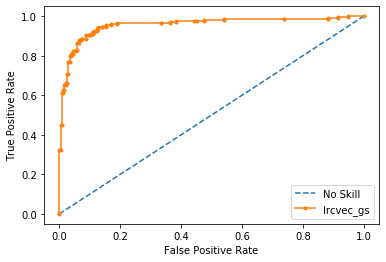

In [30]:
ROC_chart(lrcvec_gs, 'lrcvec_gs')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.3min finished


No Skill: ROC AUC=0.500
Model score : ROC AUC=0.966


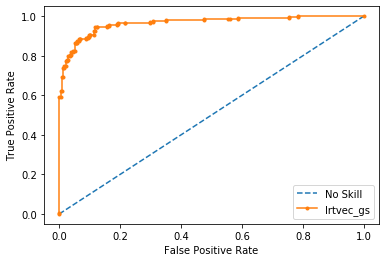

In [31]:
ROC_chart(lrtvec_gs, 'lrtvec_gs')

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  6.3min finished


No Skill: ROC AUC=0.500
Model score : ROC AUC=0.967


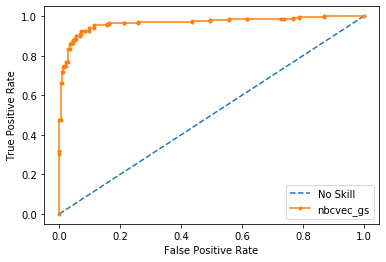

In [32]:
ROC_chart(nbcvec_gs, 'nbcvec_gs')

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  6.6min finished


No Skill: ROC AUC=0.500
Model score : ROC AUC=0.969


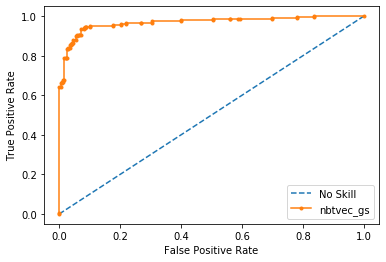

In [33]:
ROC_chart(nbtvec_gs, 'nbtvec_gs')

From the ROC AUC charts, we also see that the multinomial bayes with TFIDF vectorizer produces the best ROC AUC score of 0.969, having the best trade off between true positive and false positive rates.

### Misclassified posts

As the accuracy is fairly high, one reason there could be misclassfication is because some words or words combinations that do not normally appear together in one of the classes shows up in the records

In [37]:
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index

In [169]:
# confirming the indx 375
input_txt = X_test.loc[375]
print(input_txt)
pred = naivebayes_tvec.predict_proba(np.array([input_txt]))

print(pred)
print(y_test.loc[375])

loan check loan loan check post information whether loan backstory check mail u treasury tax return got taken loan since hit money since
[[0.83023857 0.16976143]]
1


In [198]:
# Create DataFrame that shows misclassification between predicted and actual subreddits and the text of those misclassification
# getting the records where y_test differs from y pred
misclassify = y_test!=y_pred

misclassify_df = pd.DataFrame({'text':X_test[misclassify],'Predicted':y_test[misclassify],'Actual':y_pred[misclassify]})
misclassify_df


text  Predicted  Actual
571   paymenthey new looking insight score month pay...          1       0
1841  care employer loan paymenti topic saw post men...          0       1
1503  finally owe putting stimulus check loan annual...          0       1
9     small loan le ran issue unemployment getting w...          1       0
46    capital accruing interest zero balancehey tune...          1       0
1377  year later havent much pretty much havent paym...          0       1
615   fianc pslf payment plan qualifiesmy fianc nurs...          1       0
1869  care act tax fee employer available self contr...          0       1
1459  suggestion taking care college college quite s...          0       1
375   loan check loan loan check post information wh...          1       0
1893  wage garnishesjust give everyone wage garnish ...          0       1
68    pay pay teacher current k loan master system m...          1       0
391   debt payoff strategy avalanche snowball hello ...          1       0
784   loan suggestionshello guy help looking loan st...          1       0
419   parent paying minimum private loan sure much p...          1       0
1262  thank long short time enough save processing c...          0       1
1674  worth hello senior high school right two week ...          0       1
253   extra payment car loani three year car loan ap...          1       0
1717  settlement lawyer private loan enough pay howe...          0       1
1057  since one year ago exactly one year ago master...          0       1
1099  legitimate help org gonna lie yahoo email wort...          0       1
1513  question mpnso list reference name system appa...          0       1
1194  new fall question college k yea k k school muc...          0       1
1612  question loanshey sophomore loan bc parent can...          0       1
1288  refinancing rent obligation school apartment l...          0       1
1620  filing tax probably right place post always go...          0       1
1692  loan forgiventhe situation opinion appears pin...          0       1
695   paying loan completely score better keep loan ...          1       0
1121  loani looking requirement plus loan bit regula...          0       1
521   permanent default rate something quite back ca...          1       0
605   score v loan payoff history thin loan paying l...          1       0
1656  thought return investment hello high school se...          0       1
458   employable bachelor degree businessi universit...          1       0
1915  pay loan since secure act late last year anyon...          0       1
1447  finance college year temporarily living relati...          0       1

In [183]:
# Posts not classified correctly coming from personal finance
for i in misclassify_df[(misclassify_df['Actual'] - misclassify_df['Predicted']) > 0]['text']:
    print(i)
    print('-'*10)

care employer loan paymenti topic saw post mentioning really much information work small business employer recently care act tax break employer pay loan employee company look research benefit company first pay loan per year cover part tax year money back interest employer pay lower salary start benefit pretty low salary guess really anyone experience employer payment loan generally even experience new law whether employer set following article
----------
finally owe putting stimulus check loan annual salary finally owe year small victory one working reach long time
----------
year later havent much pretty much havent payment year since ive k k original loan option time limit thing way k pay
----------
care act tax fee employer available self contractor anyone possible self person contractor new rule loan payment tax free via business
----------
suggestion taking care college college quite sometime ago leave sometime balance loan rather within college bursar unless pay le cannot enroll 

In [184]:
# Posts not classified correctly coming from student loans
for i in misclassify_df[(misclassify_df['Actual'] - misclassify_df['Predicted']) < 0]['text']:
    print(i)
    print('-'*10)

paymenthey new looking insight score month payment charge payment payment ever entire life year history well payment score point anyone anything forgiven small
----------
small loan le ran issue unemployment getting week looking small loan le anyone website anything approve
----------
capital accruing interest zero balancehey tune usd april full thanks stimulus check morning interest work wait another billing cycle officially gone check light
----------
fianc pslf payment plan qualifiesmy fianc nurse set loan year payment plan last year set plan loan together got call navient telling loan onto pslf track make payment loan forgiven however loan make ineligible forgiveness mistaken
----------
loan check loan loan check post information whether loan backstory check mail u treasury tax return got taken loan since hit money since
----------
pay pay teacher current k loan master system move measly pay scale math million time matter service loan forgiveness program etc pay amount ever contine

In [223]:
# display the words and corresponding coefficient values for the model selected
word_coeff = pd.DataFrame(nbtvec_gs.best_estimator_.steps[1][1].coef_).T
word_coeff.columns = ['coeffcient']

word_coeff['word'] = nbtvec_gs.best_estimator_.steps[0][1].get_feature_names()
word_coeff = word_coeff[['word','coeffcient']]
word_coeff = word_coeff.sort_values('coeffcient',ascending = False)
word_coeff.head(10)

word  coeffcient
3903     year   -5.085548
20    account   -5.134337
2058    money   -5.307000
3456      tax   -5.387939
2089    month   -5.399353
1491      ira   -5.461020
458       car   -5.478133
2399      pay   -5.494081
1346    house   -5.563052
3061   saving   -5.568304

I noticed that the highest value coefficients such as the ones displayed appear in the class 1 (personal finance) EDA. 
The lowest valued coefficients seem to be from class 0 (Student Loans). I was not able to find information on this last night but if true, it can serve as a reliable indicator what specific topics people in the subreddit talk about and companies could use this information to advertise their products and services related to the words as shown.


## Conclusion and recommendation

The model that I have chosen is Gridsearch CV multinomial bayes TFIDF vectorizer as it has presented the best test score at 0.92 and Niave Bayes modeling is also able to work well with smaller datasets as such in this case where there's 900 plus data points for each subreddit. Also, because the data is not numerical but categorical, Naive Bayes also works well with it.
The model seems to be overfit and one could argue perhaps both subreddit topics differ somewhat but I believe they have similar topics and context and I would have to continue to look into this.
I tried experimenting around with the proba treshold for the confusion matrix but still found the best treshold to be 0.5. Accuracy is a good score indicating most predicted values were properly classified to each subreddit. One thing to note is that false negative is higher than false positive and usually false negatives are seen as more severe than false positives but because our prototype model is trying to detect where posts came from two fairly similar subreddits the false negatives would be considered so severe as compared to lets say a classification where class 1 is having breast cancer and class 0 is not having breast cancer. One thing to note when using accuracy as a metric is that datasets of both classifications should be symmetrical. 

Some things to consider:

As the dataset contained about 900 plus posts per subreddit, it may not be representative of each subreddit. More webscraping could be done in the future.

It is possible people's comments could be a good feature to analyze but I am not sure

Due to time restrictions I was not able to repeatedly see words that could be taken out but it could be beneficial to take out words that have similar meaning or synonymous with other words and possibly words that did not get lemmatized.

I should try more models next time like an ensemble model like random forest (Laptop started overheating and process took too long to complete)

Coefficients could help give companies intending to advertise their products and services by showing what people specifically talk about in each subreddit